In [1]:
%matplotlib inline

In [2]:
from analysis import *

Reading data...
ready


# Crimes per Police District
Each incident that police are called out for, can result in zero or more bookings. However our dataset only includes inicidents where charges were booked, so each incident results in one or more bookings.
Two districts "Southern" and "Tenderloin" have the same number of bookings as they have incidents, meaning in those districts the perpetrators only get charge with one crime. Most of the other districts show a slight 

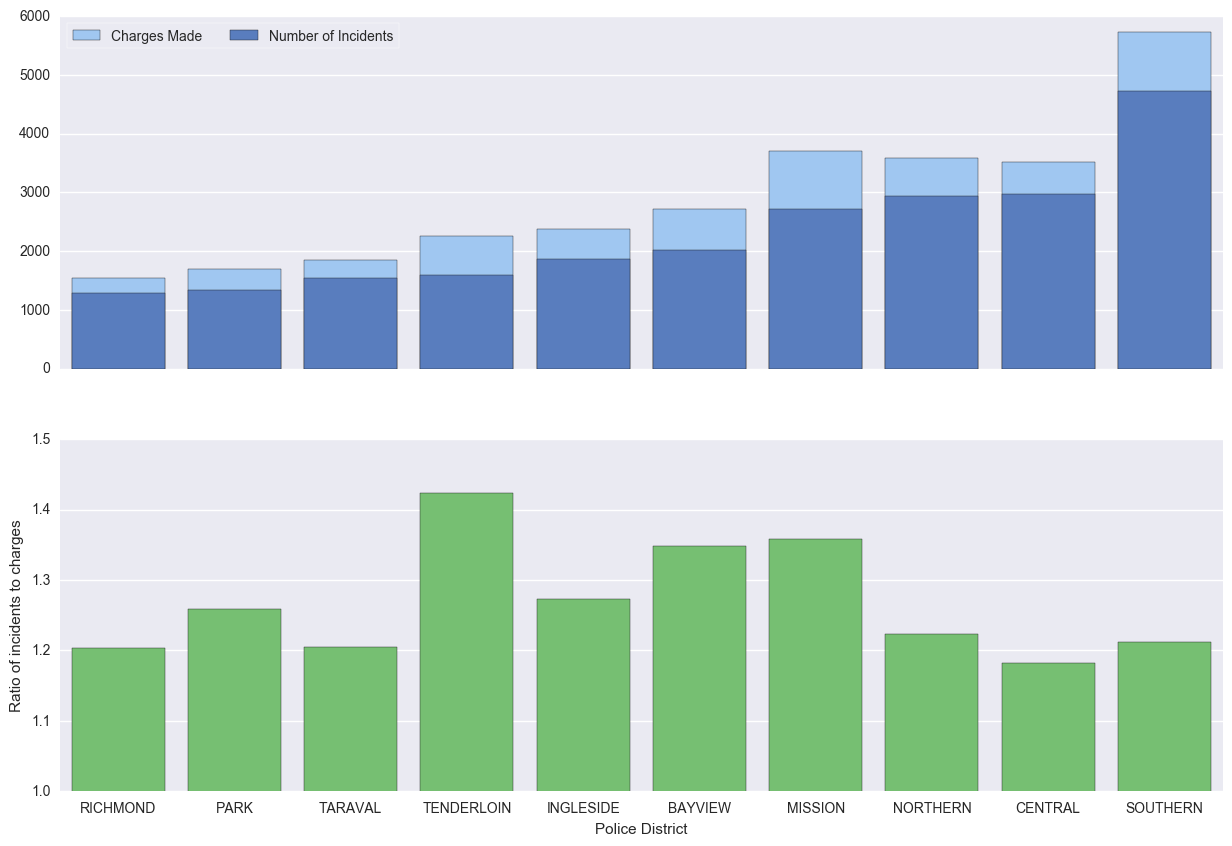

In [31]:
districts = pandas.DataFrame({
    "Charges": sanfran.groupby("PdDistrict").count()["PdId"],
    "Incidents": filteredData.groupby("PdDistrict").count()["PdId"]
})
districts["Ratio"] = districts["Charges"] / districts["Incidents"]
districts = districts.sort_values("Incidents")
districts.style.format({"Ratio":"{:.0}"})

f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 10), sharex=True, squeeze=True)
sns.set_color_codes("pastel")
plot4 = sns.countplot(x="PdDistrict", data=sanfran, color="b", label="Charges Made", order=districts.index, ax=ax1)
sns.set_color_codes("muted")
plot5 = sns.countplot(x="PdDistrict", data=filteredData, color="b", label="Number of Incidents", order=districts.index, ax=ax1)
#sns.despine(left=True, bottom=True)

plot6 = sns.barplot(data=districts,x=districts.index, y="Ratio", order=districts.index, ax=ax2, color="g")

ax1.legend(ncol=2, loc="upper left", frameon=True);
ax1.set(ylabel="", xlabel="");
ax2.set(ylabel="Ratio of incidents to charges", xlabel="Police District", ylim=[1.0,1.5]);